<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Hands on Lab: Complete the Machine Learning Prediction lab


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


We will import the following libraries for the lab


In [32]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

This function is to plot the confusion matrix.


In [33]:
def plot_confusion_matrix(y,y_predict,fig_name):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.savefig(fig_name, dpi='figure', format='eps', backend='ps', bbox_inches='tight')
    plt.show() 

## Load the dataframe


Load the data


In [34]:
data = pd.read_csv("dataset_part_2.csv")
data.shape


(90, 18)

In [35]:
data.describe()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Longitude,Latitude,Class
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,45.500000,6104.959412,1.788889,3.500000,1.655556,-86.366477,29.449963,0.666667
std,26.124701,4694.671720,1.213172,1.595288,1.710254,14.149518,2.141306,0.474045
min,1.000000,350.000000,1.000000,1.000000,0.000000,-120.610829,28.561857,0.000000
25%,23.250000,2510.750000,1.000000,2.000000,0.000000,-80.603956,28.561857,0.000000
50%,45.500000,4701.500000,1.000000,4.000000,1.000000,-80.577366,28.561857,1.000000
75%,67.750000,8912.750000,2.000000,5.000000,3.000000,-80.577366,28.608058,1.000000
max,90.000000,15600.000000,6.000000,5.000000,5.000000,-80.577366,34.632093,1.000000


In [36]:
cat = ['FlightNumber','PayloadMass','Flights', 'Block','ReusedCount',
       'Longitude', 'Latitude','Class','BoosterVersion', 'Date']

df_cat = data.drop(columns=cat)

df_cat.describe(exclude=None)

,Orbit,LaunchSite,Outcome,GridFins,Reused,Legs,LandingPad,Serial
count,90,90,90,90,90,90,64,90
unique,11,3,8,2,2,2,5,53
top,GTO,CCAFS SLC 40,True ASDS,True,False,True,5e9e3032383ecb6bb234e7ca,B1049
freq,27,55,41,70,53,71,35,6


In [37]:
df_cat.replace(to_replace=np.nan, value='5e9e3032383ecb6bb234e7ca',
               inplace=True)

In [38]:
df_cat.columns

Index(['Orbit', 'LaunchSite', 'Outcome', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Serial'], dtype='object')

In [39]:
to_replace = list(df_cat['GridFins'].unique())

values = np.linspace(start=0,
                     stop=(df_cat['GridFins'].unique().shape[0]-1),
                     num=df_cat['GridFins'].unique().shape[0],
                     dtype='int')

values = list(values)

df_cat['GridFins'].replace(to_replace=to_replace,
                           value=values,
                           inplace=True)

<positron-console-cell-39>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


<positron-console-cell-39>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


In [40]:
to_replace = list(df_cat['Orbit'].unique())

values = np.linspace(start=0,
                     stop=(df_cat['Orbit'].unique().shape[0]-1),
                     num=df_cat['Orbit'].unique().shape[0],
                     dtype='int')

values = list(values)

df_cat['Orbit'].replace(to_replace=to_replace,
                           value=values,
                           inplace=True)

df_cat['Orbit']

<positron-console-cell-40>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


<positron-console-cell-40>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


0     0
1     0
2     1
3     2
4     3
     ..
85    8
86    8
87    8
88    8
89    7
Name: Orbit, Length: 90, dtype: int64

In [41]:
to_replace = list(df_cat['LaunchSite'].unique())

values = np.linspace(start=0,
                     stop=(df_cat['LaunchSite'].unique().shape[0]-1),
                     num=df_cat['LaunchSite'].unique().shape[0],
                     dtype='int')

values = list(values)

df_cat['LaunchSite'].replace(to_replace=to_replace,
                           value=values,
                           inplace=True)

df_cat['LaunchSite']

<positron-console-cell-41>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


<positron-console-cell-41>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


0     0
1     0
2     0
3     1
4     0
     ..
85    2
86    2
87    2
88    0
89    0
Name: LaunchSite, Length: 90, dtype: int64

In [42]:
to_replace = list(df_cat['Outcome'].unique())

values = np.linspace(start=0,
                     stop=(df_cat['Outcome'].unique().shape[0]-1),
                     num=df_cat['Outcome'].unique().shape[0],
                     dtype='int')

values = list(values)

df_cat['Outcome'].replace(to_replace=to_replace,
                           value=values,
                           inplace=True)

df_cat['Outcome']

<positron-console-cell-42>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


<positron-console-cell-42>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


0     0
1     0
2     0
3     1
4     0
     ..
85    6
86    6
87    6
88    6
89    6
Name: Outcome, Length: 90, dtype: int64

In [43]:
to_replace = list(df_cat['Reused'].unique())

values = np.linspace(start=0,
                     stop=(df_cat['Reused'].unique().shape[0]-1),
                     num=df_cat['Reused'].unique().shape[0],
                     dtype='int')

values = list(values)

df_cat['Reused'].replace(to_replace=to_replace,
                           value=values,
                           inplace=True)

df_cat['Reused']

<positron-console-cell-43>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


<positron-console-cell-43>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


0     0
1     0
2     0
3     0
4     0
     ..
85    1
86    1
87    1
88    1
89    0
Name: Reused, Length: 90, dtype: int64

In [44]:
to_replace = list(df_cat['Legs'].unique())

values = np.linspace(start=0,
                     stop=(df_cat['Legs'].unique().shape[0]-1),
                     num=df_cat['Legs'].unique().shape[0],
                     dtype='int')

values = list(values)

df_cat['Legs'].replace(to_replace=to_replace,
                           value=values,
                           inplace=True)

df_cat['Legs']

<positron-console-cell-44>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


<positron-console-cell-44>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


0     0
1     0
2     0
3     0
4     0
     ..
85    1
86    1
87    1
88    1
89    1
Name: Legs, Length: 90, dtype: int64

In [45]:
to_replace = list(df_cat['LandingPad'].unique())

values = np.linspace(start=0,
                     stop=(df_cat['LandingPad'].unique().shape[0]-1),
                     num=df_cat['LandingPad'].unique().shape[0],
                     dtype='int')

values = list(values)

df_cat['LandingPad'].replace(to_replace=to_replace,
                           value=values,
                           inplace=True)

df_cat['LandingPad']

<positron-console-cell-45>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


<positron-console-cell-45>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


0     0
1     0
2     0
3     0
4     0
     ..
85    0
86    0
87    0
88    3
89    0
Name: LandingPad, Length: 90, dtype: int64

In [46]:
to_replace = list(df_cat['Serial'].unique())

values = np.linspace(start=0,
                     stop=(df_cat['Serial'].unique().shape[0]-1),
                     num=df_cat['Serial'].unique().shape[0],
                     dtype='int')

values = list(values)

df_cat['Serial'].replace(to_replace=to_replace,
                           value=values,
                           inplace=True)

df_cat['Serial']

<positron-console-cell-46>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


<positron-console-cell-46>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


0      0
1      1
2      2
3      3
4      4
      ..
85    51
86    50
87    47
88    51
89    52
Name: Serial, Length: 90, dtype: int64

In [47]:
df_cat['Orbit'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [48]:
df_num = data.select_dtypes(include=np.number)
df_num.drop(['Longitude','Latitude'], axis=1, inplace=True)

In [49]:
frames = [df_cat, df_num]

In [50]:
df = pd.concat(frames)

In [51]:
df_cat.describe()
df_num.describe()
df_cat.shape
df_num.shape

(90, 6)

In [52]:
df = pd.concat(frames, axis=1).reindex(df_cat.index)
df.describe()

,Orbit,LaunchSite,Outcome,GridFins,Reused,Legs,LandingPad,Serial,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Class
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,3.411111,0.633333,4.011111,0.777778,0.411111,0.788889,0.800000,32.422222,45.500000,6104.959412,1.788889,3.500000,1.655556,0.666667
std,2.710340,0.853940,2.451757,0.418069,0.494792,0.410383,1.237976,15.024308,26.124701,4694.671720,1.213172,1.595288,1.710254,0.474045
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,350.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,0.000000,2.000000,1.000000,0.000000,1.000000,0.000000,21.250000,23.250000,2510.750000,1.000000,2.000000,0.000000,0.000000
50%,3.000000,0.000000,5.000000,1.000000,0.000000,1.000000,0.000000,36.000000,45.500000,4701.500000,1.000000,4.000000,1.000000,1.000000
75%,5.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,44.000000,67.750000,8912.750000,2.000000,5.000000,3.000000,1.000000
max,10.000000,2.000000,7.000000,1.000000,1.000000,1.000000,4.000000,52.000000,90.000000,15600.000000,6.000000,5.000000,5.000000,1.000000


In [53]:
Y = df['Class'].to_numpy

## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [54]:
Y = df['Class'].to_numpy()
X = df.drop('Class', axis=1)

## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [55]:
# students get this 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score as score

transform = MinMaxScaler()

X_scaled = transform.fit(X).transform(X)
X_scaled

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        , 0.        ],
       [0.1       , 0.        , 0.        , ..., 0.        , 0.        , 0.        ],
       ...,
       [0.8       , 1.        , 0.85714286, ..., 1.        , 1.        , 1.        ],
       [0.8       , 0.        , 0.85714286, ..., 0.4       , 1.        , 0.4       ],
       [0.7       , 0.        , 0.85714286, ..., 0.        , 1.        , 0.        ]])

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2,
                                                    random_state=2)

we can see we only have 18 test samples.


In [57]:
y_test.shape

(18,)

## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [58]:
parameters ={'C':[0.001,0.01,0.1,1,10],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [59]:
lr=LogisticRegression()

In [60]:
logreg_cv = GridSearchCV(
    estimator=lr,
    param_grid=parameters,
    cv=10,
    n_jobs=12
)

logreg_cv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=12,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [61]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy : %0.4f" % 
      score(y_true=y_train, y_pred=logreg_cv.predict(X_train)))

tuned hpyerparameters :(best parameters)  {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8889


In [62]:
yhat = logreg_cv.predict(X_train)

print('Sucessful landing rate = %0.4f' % (yhat.sum() / y_train.sum()))
print('Fail landing rate = %0.4f' % 
      ((y_train.shape[0] - yhat.sum()) / (y_train.shape[0] - y_train.sum())))

Sucessful landing rate = 1.0833
Fail landing rate = 0.8333


## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


In [63]:
from sklearn.metrics import accuracy_score as score

yhat = logreg_cv.predict(X_test)

score(y_pred=yhat, y_true=y_test)

0.8333333333333334

In [64]:
print('Sucessful landing rate = %0.4f' % (yhat.sum() / y_test.sum()))
print('Fail landing rate = %0.4f' % 
      ((y_test.shape[0] - yhat.sum()) / (y_test.shape[0] - y_test.sum())))

Sucessful landing rate = 1.2500
Fail landing rate = 0.5000


Lets look at the confusion matrix:


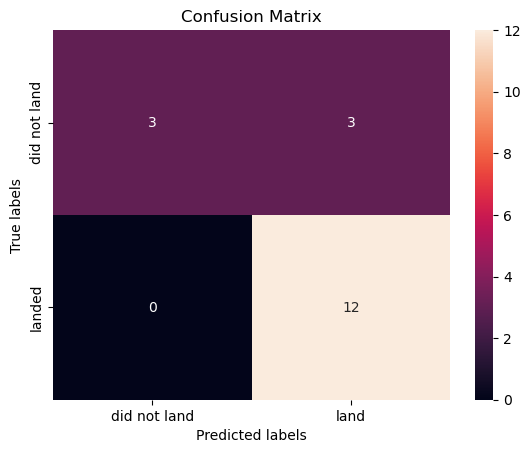

In [65]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(y_test,yhat,'msel_lr.eps')

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the problem is false positives.

Overview:

True Postive - 12 (True label is landed, Predicted label is also landed)

False Postive - 3 (True label is not landed, Predicted label is landed)


## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [66]:
parameters = {
    'kernel': ['poly', 'linear', 'rbf', 'sigmoid'],
    'C': np.logspace(-3, 3, 5),
    'gamma':np.logspace(-3, 3, 5)}

svm = SVC()

In [67]:
svm_cv = GridSearchCV(
    estimator=svm,
    param_grid=parameters,
    cv=10,
    n_jobs=12
)

svm_cv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(), n_jobs=12,
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01, 1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01, 1.00000000e+03]),
                         'kernel': ['poly', 'linear', 'rbf', 'sigmoid']})

In [68]:
svm_cv.best_score_

0.8607142857142858

In [69]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy : %0.4f" % 
      score(y_true=y_train, y_pred=svm_cv.predict(X_train)))

tuned hpyerparameters :(best parameters)  {'C': 1000.0, 'gamma': 0.03162277660168379, 'kernel': 'rbf'}
accuracy : 0.9583


In [70]:
yhat = svm_cv.predict(X_train)

print('Sucessful landing rate = %0.4f' % (yhat.sum() / y_train.sum()))
print('Fail landing rate = %0.4f' % 
      ((y_train.shape[0] - yhat.sum()) / (y_train.shape[0] - y_train.sum())))

Sucessful landing rate = 1.0208
Fail landing rate = 0.9583


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [71]:
yhat = svm_cv.best_estimator_.predict(X_test)
score(y_true=y_test, y_pred=yhat)

1.0

In [72]:
print('Sucessful landing rate = %0.4f' % (yhat.sum() / y_test.sum()))
print('Fail landing rate = %0.4f' % 
      ((y_test.shape[0] - yhat.sum()) / (y_test.shape[0] - y_test.sum())))

Sucessful landing rate = 1.0000
Fail landing rate = 1.0000


We can plot the confusion matrix


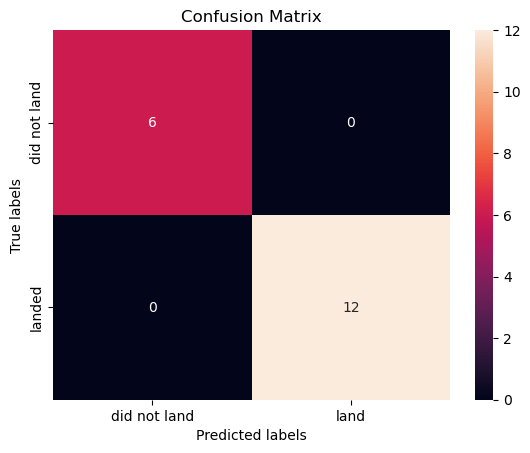

In [73]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(y_test,yhat,'msel_svm.eps')

## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [74]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['log2', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [75]:
tree_cv = GridSearchCV(
    estimator=tree,
    param_grid=parameters,
    cv=10,
    n_jobs=12
)

tree_cv.fit(X_train,y_train)

/home/frank/bin/anaconda/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=12,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [76]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy : %0.4f" % 
      score(y_true=y_train, y_pred=tree_cv.predict(X_train)))

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 16, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
accuracy : 1.0000


In [77]:
yhat = tree_cv.predict(X_train)

print('Sucessful landing rate = %0.4f' % (yhat.sum() / y_train.sum()))
print('Fail landing rate = %0.4f' % 
      ((y_train.shape[0] - yhat.sum()) / (y_train.shape[0] - y_train.sum())))

Sucessful landing rate = 1.0000
Fail landing rate = 1.0000


## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [78]:
yhat = tree_cv.predict(X_test)

score(y_true=y_test, y_pred=yhat)

0.8888888888888888

In [79]:
print('Sucessful landing rate = %0.4f' % (yhat.sum() / y_test.sum()))
print('Fail landing rate = %0.4f' % 
      ((y_test.shape[0] - yhat.sum()) / (y_test.shape[0] - y_test.sum())))

Sucessful landing rate = 1.0000
Fail landing rate = 1.0000


We can plot the confusion matrix


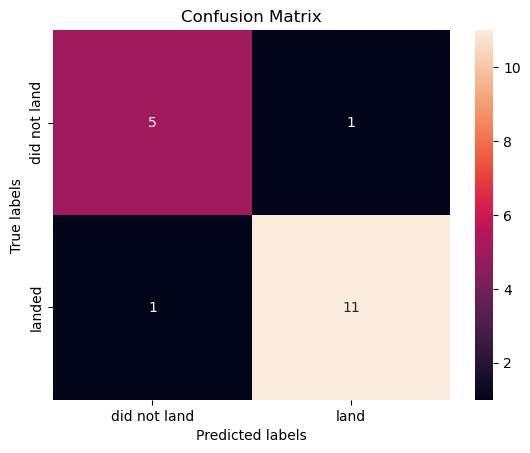

In [80]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(y_test,yhat,'msel_tree.eps')

## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [81]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [82]:
knn_cv = GridSearchCV(
    estimator=KNN,
    param_grid=parameters,
    cv=10,
    n_jobs=12
)

knn_cv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=12,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [83]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy : %0.4f" % 
      score(y_true=y_train, y_pred=knn_cv.predict(X_train)))

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 1, 'p': 1}
accuracy : 1.0000


In [84]:
yhat = knn_cv.predict(X_train)

print('Sucessful landing rate = %0.4f' % (yhat.sum() / y_train.sum()))
print('Fail landing rate = %0.4f' % 
      ((y_train.shape[0] - yhat.sum()) / (y_train.shape[0] - y_train.sum())))

Sucessful landing rate = 1.0000
Fail landing rate = 1.0000


## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


In [85]:
yhat = knn_cv.predict(X_test)

score(y_true=y_test, y_pred=yhat)

0.8333333333333334

In [86]:
print('Sucessful landing rate = %0.4f' % (yhat.sum() / y_test.sum()))
print('Fail landing rate = %0.4f' % 
      ((y_test.shape[0] - yhat.sum()) / (y_test.shape[0] - y_test.sum())))

Sucessful landing rate = 0.9167
Fail landing rate = 1.1667


We can plot the confusion matrix


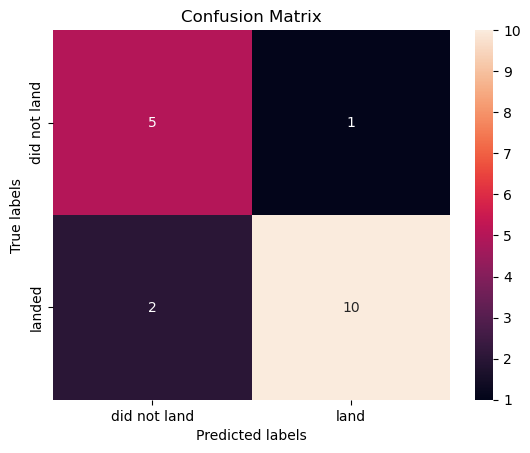

In [87]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(y_test,yhat,'msel_knn.eps')

In [88]:
from sklearn.ensemble import GradientBoostingClassifier

gb_cl = GradientBoostingClassifier()

In [89]:
parameters = {'loss': ['log_loss','exponential'],
              'learning_rate': [0.01,0.1,1.0],
              'n_estimators': [50,100,150,200],
              'criterion': ['friedman_mse','squared_error']}

In [90]:
gb_cv = GridSearchCV(
    estimator=gb_cl,
    param_grid=parameters,
    cv=10,
    n_jobs=12
)

In [91]:
gb_cv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=12,
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.01, 0.1, 1.0],
                         'loss': ['log_loss', 'exponential'],
                         'n_estimators': [50, 100, 150, 200]})

In [92]:
print("tuned hpyerparameters :(best parameters) ",gb_cv.best_params_)
print("accuracy : %0.4f" % 
      score(y_true=y_train, y_pred=gb_cv.predict(X_train)))

tuned hpyerparameters :(best parameters)  {'criterion': 'friedman_mse', 'learning_rate': 0.01, 'loss': 'log_loss', 'n_estimators': 50}
accuracy : 1.0000


In [93]:
yhat = gb_cv.predict(X_train)

print('Sucessful landing rate = %0.4f' % (yhat.sum() / y_train.sum()))
print('Fail landing rate = %0.4f' % 
      ((y_train.shape[0] - yhat.sum()) / (y_train.shape[0] - y_train.sum())))

Sucessful landing rate = 1.0000
Fail landing rate = 1.0000


In [107]:
yhat = gb_cv.predict(X_test)
score(y_true=y_test, y_pred=yhat)

1.0

In [109]:
print('Sucessful landing rate = %0.4f' % (yhat.sum() / y_test.sum()))
print('Fail landing rate = %0.4f' % 
      ((y_test.shape[0] - yhat.sum()) / (y_test.shape[0] - y_test.sum())))

y_test.shape[0] - y_test.sum()
#y_test.shape[0] - yhat.sum()

Sucessful landing rate = 1.0000
Fail landing rate = 1.0000


6

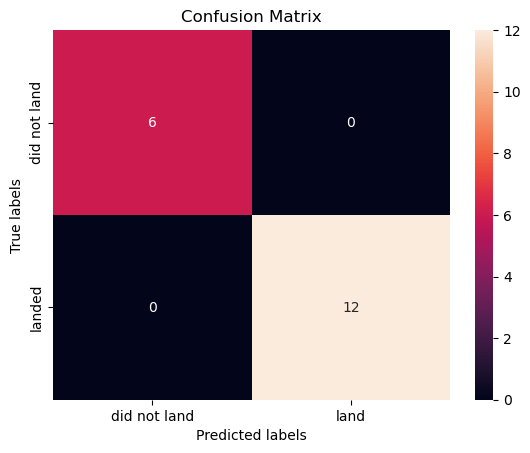

In [96]:
plot_confusion_matrix(y_test,yhat,'msel_gboost.eps')

In [97]:
from sklearn.neural_network import MLPClassifier

nn_clf = MLPClassifier(random_state=1,
                       hidden_layer_sizes=(15,5),
                       max_iter=10000)

In [98]:
parameters = {'activation': ['identity','logistic','tanh'],
              'solver': ['lbfgs','sgd'],
              'alpha': [0.0001,0.001,0.01,0.1],
              'learning_rate': ['constant','adaptive']}

In [99]:
nn_cv = GridSearchCV(
    estimator=nn_clf,
    param_grid=parameters,
    cv=10,
    n_jobs=12
)

nn_cv.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=MLPClassifier(hidden_layer_sizes=(15, 5), max_iter=10000,
                                     random_state=1),
             n_jobs=12,
             param_grid={'activation': ['identity', 'logistic', 'tanh'],
                         'alpha': [0.0001, 0.001, 0.01, 0.1],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['lbfgs', 'sgd']})

In [100]:
print("tuned hpyerparameters :(best parameters) ",nn_cv.best_params_)
print("accuracy : %0.4f" % 
      score(y_true=y_train, y_pred=nn_cv.predict(X_train)))

tuned hpyerparameters :(best parameters)  {'activation': 'logistic', 'alpha': 0.0001, 'learning_rate': 'constant', 'solver': 'lbfgs'}
accuracy : 1.0000


In [101]:
yhat = nn_cv.predict(X_train)

print('Sucessful landing rate = %0.4f' % (yhat.sum() / y_train.sum()))
print('Fail landing rate = %0.4f' % 
      ((y_train.shape[0] - yhat.sum()) / (y_train.shape[0] - y_train.sum())))

Sucessful landing rate = 1.0000
Fail landing rate = 1.0000


In [102]:
yhat = nn_cv.predict(X_test)

score(y_true=y_test, y_pred=yhat)

0.9444444444444444

In [106]:
print('Sucessful landing rate = %0.4f' % (yhat.sum() / y_test.sum()))
print('Fail landing rate = %0.4f' % 
      ((y_test.shape[0] - yhat.sum()) / (y_test.shape[0] - y_test.sum())))

Sucessful landing rate = 1.0833
Fail landing rate = 0.8333


5

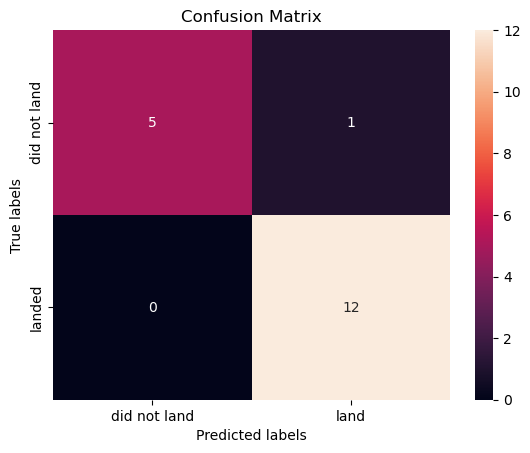

In [104]:
plot_confusion_matrix(y_test,yhat,'msel_nn.eps')

## TASK  12


Find the method performs best:


In [110]:
print('\n #### \n TRAINING DATA SCORES \n ### \n')

log_score = score(
    y_true=y_train,
    y_pred=logreg_cv.predict(X_train)
)

svm_score = score(
    y_true=y_train,
    y_pred=svm_cv.predict(X_train)
)

tree_score = score(
    y_true=y_train,
    y_pred=tree_cv.predict(X_train)
)

knn_score = score(
    y_true=y_train,
    y_pred=knn_cv.predict(X_train)
)

gboost_score = score(
    y_true=y_train,
    y_pred=gb_cv.predict(X_train)
)

nn_score = score(
    y_true=y_train,
    y_pred=nn_cv.predict(X_train)
)


print(f'Logistic regression best score (training data) = %0.4f' % logreg_cv.best_score_)
print(f'SVM best score (training data) = %0.4f' % svm_cv.best_score_)
print(f'Decision trees best score (training data) = %0.4f' % tree_cv.best_score_)
print(f'KNN best score (training data) = %0.4f' % knn_cv.best_score_)
print(f'Gradient Boost best score (training data) = %0.4f' % gb_cv.best_score_)
print(f'Neural Network best score (training data) = %0.4f' % nn_cv.best_score_)

log_score = score(
    y_true=y_test,
    y_pred=logreg_cv.predict(X_test)
)

svm_score = score(
    y_true=y_test,
    y_pred=svm_cv.predict(X_test)
)

tree_score = score(
    y_true=y_test,
    y_pred=tree_cv.predict(X_test)
)

knn_score = score(
    y_true=y_test,
    y_pred=knn_cv.predict(X_test)
)

gboost_score = score(
    y_true=y_test,
    y_pred=gb_cv.predict(X_test)
)

nn_score = score(
    y_true=y_test,
    y_pred=nn_cv.predict(X_test)
)

print('\n #### \n TEST DATA SCORES \n ### \n')

print(f'Logistic regression best score (test data) = %0.4f' % log_score)
print(f'SVM best score (test data) = %0.4f' % svm_score)
print(f'Decision trees best score (test data) = %0.4f' % tree_score)
print(f'KNN best score (test data) = %0.4f' % knn_score)
print(f'Gradient Boost best score (test data) = %0.4f' % gboost_score)
print(f'Neural Network best score (test data) = %0.4f' % nn_score)


 #### 
 TRAINING DATA SCORES 
 ### 

Logistic regression best score (training data) = 0.8625
SVM best score (training data) = 0.8607
Decision trees best score (training data) = 0.9304
KNN best score (training data) = 0.8893
Gradient Boost best score (training data) = 0.9857
Neural Network best score (training data) = 0.8625

 #### 
 TEST DATA SCORES 
 ### 

Logistic regression best score (test data) = 0.8333
SVM best score (test data) = 1.0000
Decision trees best score (test data) = 0.8889
KNN best score (test data) = 0.8333
Gradient Boost best score (test data) = 1.0000
Neural Network best score (test data) = 0.9444


## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


<!--## Change Log--!>


<!--| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|--!>


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
